In [150]:
import h5py
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss 
from sklearn.model_selection import cross_val_score
    
import statsmodels.api as sm
import itertools

from scipy.stats import mode
from scipy.stats import pearsonr

import random
 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

import xgboost as xgb
import pandas as pd

import numpy as np
from scipy import signal
from intervals import FloatInterval

In [2]:
from wonambi import Dataset
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pywt.__version__

'1.0.1'

In [128]:
dataPath="C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\raw\\"
h5filename="train.h5"
h5file= dataPath + h5filename
h5 = h5py.File(h5file, "r")
eeg_1 = pd.DataFrame(h5['eeg_1'][:])
eeg_2 = pd.DataFrame(h5['eeg_2'][:])
eeg_3 = pd.DataFrame(h5['eeg_3'][:])
eeg_4 = pd.DataFrame(h5['eeg_4'][:])
output = pd.read_csv('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\raw\\challenge_fichier_de_sortie_dentrainement_classification_en_stade_de_sommeil_a_laide_de_signaux_mesures_par_le_bandeau_dreem.csv', sep=';')
y = output["label"]

In [98]:
#cmorB-C"
# 𝐵 is the bandwidth and 𝐶 is the center frequency (peak frequency)

waveletsParams = {"slow1": (0.7, 3.0), "slow2": (1.0, 3.0), "slow3": (1.5, 3.0), "slow4": (2.0, 3.0),
                 "K1": (2.0, 3.0), "K2":(3.2, 3.0), "DeltaTheta1" : (3.0, 5.0), 
                  "DeltaTheta2" : (4.0, 5.0), "DeltaTheta3" : (5.0, 5.0), 
                  "DeltaTheta4" : (6.0, 5.0), "Alpha1": (8.0, 10.0), "Alpha2": (10.0, 10.0),
                  "Alpha3": (12.0, 10.0), "Spindle1": (12.0, 3.0), "Spindle2": (13.0, 3.0),
                  "Spindle3": (14.0, 3.0), "Spindle4": (15.0, 3.0),
                  "Beta1" : (16.0, 3.0), "Beta2" : (18.0, 3.0), "Beta3" : (20.0, 5.0),
                  "Gamma" : (40.0, 5.0)
                 }

waveletsNames = {}

for k in waveletsParams.keys():
    waveletsNames[k] = 'cmor' + str(waveletsParams[k][1]) + '-'+ str(waveletsParams[k][0])
    
#vars()[k] = pywt.ContinuousWavelet('cmor' + str(wavelets[k][1]) + '-'+ str(wavelets[k][0]))


In [99]:
waveletsNames

{'slow1': 'cmor3.0-0.7',
 'slow2': 'cmor3.0-1.0',
 'slow3': 'cmor3.0-1.5',
 'slow4': 'cmor3.0-2.0',
 'K1': 'cmor3.0-2.0',
 'K2': 'cmor3.0-3.2',
 'DeltaTheta1': 'cmor5.0-3.0',
 'DeltaTheta2': 'cmor5.0-4.0',
 'DeltaTheta3': 'cmor5.0-5.0',
 'DeltaTheta4': 'cmor5.0-6.0',
 'Alpha1': 'cmor10.0-8.0',
 'Alpha2': 'cmor10.0-10.0',
 'Alpha3': 'cmor10.0-12.0',
 'Spindle1': 'cmor3.0-12.0',
 'Spindle2': 'cmor3.0-13.0',
 'Spindle3': 'cmor3.0-14.0',
 'Spindle4': 'cmor3.0-15.0',
 'Beta1': 'cmor3.0-16.0',
 'Beta2': 'cmor3.0-18.0',
 'Beta3': 'cmor5.0-20.0',
 'Gamma': 'cmor5.0-40.0'}

In [100]:
for w in waveletsNames.keys():
    frequencies = pywt.scale2frequency(waveletsNames[w], [125]) * 125
    print(w, frequencies)

slow1 [0.6875]
slow2 [1.]
slow3 [1.5]
slow4 [2.]
K1 [2.]
K2 [3.1875]
DeltaTheta1 [3.]
DeltaTheta2 [4.]
DeltaTheta3 [5.]
DeltaTheta4 [6.]
Alpha1 [7.9375]
Alpha2 [5.9375]
Alpha3 [3.9375]
Spindle1 [3.9375]
Spindle2 [2.9375]
Spindle3 [1.9375]
Spindle4 [0.9375]
Beta1 [0.0625]
Beta2 [2.0625]
Beta3 [4.0625]
Gamma [7.8125]


In [112]:
len(waveletsNames)

21

In [101]:
dt = 1/125  # 125 Hz sampling
frequencies = pywt.scale2frequency('cmor1.5-2.0', [1, 2, 3, 4, 10, 125]) / dt
frequencies

array([250.        , 125.        ,  83.33333333,  62.5       ,
        25.        ,   2.        ])

features:
- the power of the frequency- band power signal, 
- power of the time-domain signal, 
- power of the int
- the Pearson correlation coefficient between each pair of frequency-band power signals
- the autocorrelation in the time-domain signal for 50 time lags (i.e., up to 0.5 s).


It is also very common to report the ratios between two frequency bands. For instance, the delta / beta ratio is a well-known index of slow-wave sleep quality.

In [110]:
np.reshape(np.zeros(eeg_1.shape[0]*eeg_1.shape[1]), eeg_1.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
coef, freqs=pywt.cwt(eeg_1.iloc[0, :],[125],'cmor3.0-1.0', sampling_period=1/125)
 

In [111]:
%%time
df = pd.DataFrame(data=np.reshape(np.zeros(eeg_1.shape[0]*eeg_1.shape[1]), eeg_1.shape))
for i in range(eeg_1.shape[0]):
    coef, freqs=pywt.cwt(eeg_1.iloc[i, :],[125],'cmor3.0-1.0', sampling_period=1/125)
    #slow2
    df.iloc[i,:]= np.absolute(coef)
df.head()    

Wall time: 2min 33s


In [ ]:
output[output.label==2]

In [137]:
slow2_energy = df.sum(axis=1)
tmp = slow2_energy[output.label==2].mean()
print(round(tmp))
print(round(slow2_energy[output.label!=2].mean()))

817934
4118142


In [145]:
print(df.iloc[:, 60:].shape)
print(df.iloc[:, :-60].shape)

(43830, 3690)
(43830, 3690)


In [157]:
%%time
L = []
for i in range(df.shape[0]):
    cor = pearsonr(df.iloc[i, 60:], df.iloc[i, :-60])[0]
    L.append(cor)


Wall time: 16.9 s


In [162]:
Sl = pd.Series(data=L)

In [165]:
len(Sl[Sl<0.8])

309

In [56]:
np.absolute(coef)

array([[4.6093805 , 4.6385601 , 4.64574815, ..., 7.57397567, 8.0222775 ,
        8.25873899]])

In [55]:
print(len(coef))
print(len(coef[0]))
coef[0]
b

1
3750


array([ 0.42565298-4.58968497j, -2.1557035 -4.10721101j,
       -4.17608752-2.03550213j, ...,  6.69861889+3.53463046j,
        7.97446492-0.87455443j,  5.53321728-6.13109094j])

In [16]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

wav = pywt.ContinuousWavelet('cmor1.5-1.0')

Continuous wavelet will be evaluated over the range [-8.0, 8.0]


C:\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


Text(0.5,1,'|FFT(filter)|$^2$')

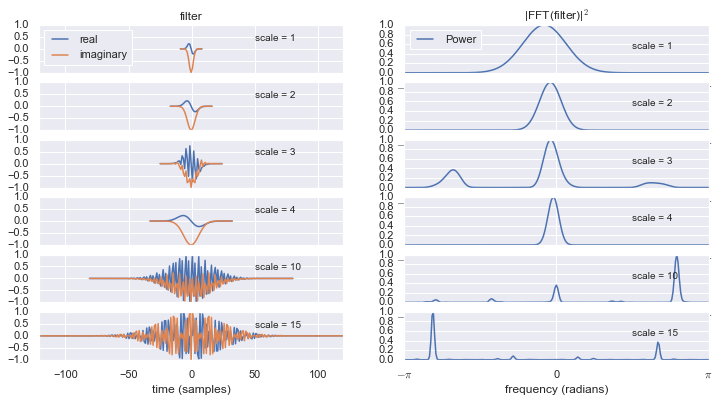

In [97]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

#cmorB-C"
# 𝐵 is the bandwidth and 𝐶 is the center frequency (peak frequency)
wav = pywt.ContinuousWavelet('cmor5.0-40.0')
#pywt.ContinuousWavelet('cmor1.5-2.0')

# print the range over which the wavelet will be evaluated
print("Continuous wavelet will be evaluated over the range [{}, {}]".format(
    wav.lower_bound, wav.upper_bound))

width = wav.upper_bound - wav.lower_bound

#scales = [ 10, 15]
scales = [1, 2, 3, 4, 10, 15]

max_len = int(np.max(scales)*width + 1)
t = np.arange(max_len)
fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
for n, scale in enumerate(scales):

    # The following code is adapted from the internals of cwt
    int_psi, x = pywt.integrate_wavelet(wav, precision=10)
    step = x[1] - x[0]
    j = np.floor(
        np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    j = j.astype(np.int)

    # normalize int_psi for easier plotting
    int_psi /= np.abs(int_psi).max()

    # discrete samples of the integrated wavelet
    filt = int_psi[j][::-1]

    # The CWT consists of convolution of filt with the signal at this scale
    # Here we plot this discrete convolution kernel at each scale.

    nt = len(filt)
    t = np.linspace(-nt//2, nt//2, nt)
    axes[n, 0].plot(t, filt.real, t, filt.imag)
    axes[n, 0].set_xlim([-max_len//2, max_len//2])
    axes[n, 0].set_ylim([-1, 1])
    axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))

    f = np.linspace(-np.pi, np.pi, max_len)
    filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
    filt_fft /= np.abs(filt_fft).max()
    axes[n, 1].plot(f, np.abs(filt_fft)**2)
    axes[n, 1].set_xlim([-np.pi, np.pi])
    axes[n, 1].set_ylim([0, 1])
    axes[n, 1].set_xticks([-np.pi, 0, np.pi])
    axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    axes[n, 1].grid(True, axis='x')
    axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))

axes[n, 0].set_xlabel('time (samples)')
axes[n, 1].set_xlabel('frequency (radians)')
axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
axes[0, 1].legend(['Power'], loc='upper left')
axes[0, 0].set_title('filter')
axes[0, 1].set_title(r'|FFT(filter)|$^2$')

In [13]:
dt = 1/125  # 125 Hz sampling

In [23]:
frequencies = pywt.scale2frequency('cmor1.5-1.0', [1, 2, 3, 4, 10, 125]) / dt
frequencies

array([125.        ,  62.5       ,  41.66666667,  31.25      ,
        12.5       ,   1.        ])